In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from textblob import TextBlob
import numpy as np

# Loading the fine CSV file 'Brexit_.csv'
brex = pd.read_csv('Brexit_.csv', sep=',')

brex

,tweet_id,username,verified,followers,created_at,tweet_text,reply_to_user,reply_to_tweet,platform,quoted,retweeted,likes,retweets,user_location
0,934572402494799873,onlyconnect71,False,93,2017-11-25 23:59:58,RT @Undercover_mole: The 7th YouGov poll that has give Remain a lead and shows that people are regretting the decision to leave the EU. It'…,NaN,NaN,Twitter for iPad,False,False,0,200,Yorkshire
1,934572382789996546,turks22,False,2798,2017-11-25 23:59:54,RT @AdamRamsay: The DUP say their secret £435k came from Unionist donors. So I investigated all the big ones. Here's what I found: https://…,NaN,NaN,Twitter for iPad,False,False,0,1076,Lake District
2,934572381338824705,HackettTom,False,2240,2017-11-25 23:59:53,RT @JoRichardsKent: “One senior Government source claimed the [Legatum] institute had ‘staged a soft coup via Johnson and Gove’ and that ci…,NaN,NaN,Twitter for iPad,False,False,0,320,EU
3,934572380755824645,petermcqu,False,162,2017-11-25 23:59:53,RT @Otto_English: This is disturbing https://t.co/XKBpLIw5qP,NaN,NaN,Twitter Web Client,False,False,0,92,Uk
4,934572378574807041,R3Cooper,False,419,2017-11-25 23:59:53,RT @mikegalsworthy: Brexit doesn't work as advertised - it's a bust product. So let's take it back to the shop and say no thanks. https://t…,NaN,NaN,Twitter for iPad,False,False,0,2044,"Coniston, England"
5,934572360451190784,xenopoesis3,False,1504,2017-11-25 23:59:48,"RT @EmilTschepp: “#Brexit has fucked everything up""\nhttps://t.co/fpufo1YLRr",NaN,NaN,Twitter Lite,False,False,0,2,Manchester
6,934572356340715520,AnthonyMortlock,False,175,2017-11-25 23:59:47,@jeremycorbyn @UKLabour BREXIT.Theres now so much bad news affecting working people along with proof that the leave… https://t.co/NGZQLxl4l4,jeremycorbyn,9.344630e+17,Twitter for iPad,False,False,0,0,NaN
7,934572355233435649,MarkPendleton,False,231,2017-11-25 23:59:47,"RT @chopking: So by my reckoning, we should be ready to see if the democratic will of the people has changed regarding Brexit, 763 days aft…",NaN,NaN,Twitter for iPad,False,False,0,1,"Cardiff, Wales"
8,934572349596323840,heidiEC5,False,5311,2017-11-25 23:59:46,"RT @DanielJHannan: The most vocal Remainers in my timeline operate a simple algorithm. \nGood news: ""WE. HAVEN'T. LEFT. YET. YOU. MORONS.""\nB…",NaN,NaN,Twitter for Android,False,False,0,590,No Lists Please.
9,934572347402653696,RealityUK_2016,False,1729,2017-11-25 23:59:45,RT @Far_Right_Watch: Best. #Brexit. Cartoon. Ever. :-) https://t.co/Xtl2vZAeBb,NaN,NaN,Twitter Web Client,False,False,0,302,London


In [288]:
round(brex[['followers', 'likes', 'retweets']].describe(),2)

# basic descriptive statistics of 'followers', 'likes' and 'retweets'

,followers,likes,retweets
count,2000.00,2000.00,2000.00
mean,3050.84,1.18,419.09
std,23417.83,12.99,847.89
min,0.00,0.00,0.00
25%,217.50,0.00,3.00
50%,630.00,0.00,61.00
75%,1660.75,0.00,324.50
max,881755.00,375.00,12659.00


In [289]:
brex.verified.value_counts()

# number of non-verified vs verified users tweeting about Brexit in the sample

False    1976
True       24
Name: verified, dtype: int64

In [294]:
brex[['username','platform']].describe()

# primary statistics of users and platforms used to tweet 

,username,platform
count,2000,2000
unique,1330,58
top,bobbysmiff,Twitter for Android
freq,17,547


In [296]:
brex.username.value_counts().head(10)

# users with highest frequency of occurance in the sample

bobbysmiff       17
csibike1         14
LiveEUDebate     12
Oldbutthappy1    12
Hubblebubble8    12
SponPlague       10
Alba40           10
onlyconnect71    10
JamesSmithee1     9
Jayoberoi2        9
Name: username, dtype: int64

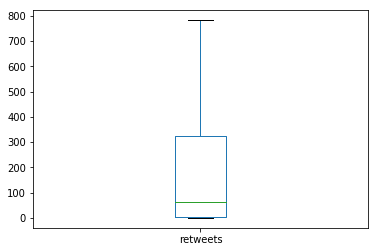

In [299]:
brex['retweets'].plot(kind = 'box',showfliers=False)
plt.show()

# boxplot of retweets (excluding outliers)

In [300]:
brex[['username','followers']].sort_values('followers',ascending=False).head(10)

# acconts tweeting about Brexit with highest follower count

,username,followers
1716,TheNationalUAE,881755
1114,IrishTimes,398140
1291,Firstmate1060,209264
819,V_of_Europe,174199
1062,mikebutcher,137262
160,the_ecologist,134397
1187,Scientists4EU,84897
366,Rowland72James,63342
1202,IrishTimesBiz,61766
19,MarieAnnUK,54177


In [301]:
brex.tweet_text.str.split(expand=True).stack().value_counts().head(30)

# most frequent words found in the tweets

RT         1566
the        1330
to          913
Brexit      686
of          666
and         574
is          468
a           457
in          415
for         378
UK          351
on          308
by          259
&amp;       257
The         231
that        220
be          203
EU          196
Johnson     194
#Brexit     190
-           180
I           164
who         155
will        152
with        144
this        139
plan        130
as          130
it          127
vote        120
dtype: int64

In [402]:
# Creating a subset of all migration-related tweets
migration = brex.loc[brex.tweet_text.str.contains("reality | people | citizens | leave | deal | impact | migration | work | money | jobs", na=False)].copy()
# Writing results into a separate CSV file 
migration.to_csv('mig.csv', sep=',')

# Descriptives:
print(migration.username.describe())

round(migration[['likes', 'retweets']].describe(),2)

print(sum(brex.retweets))
print(sum(migration.retweets))

print(sum(brex.likes))
print(sum(migration.likes))

print(brex.verified.value_counts())
print(migration.verified.value_counts())

count            224
unique           197
top       bobbysmiff
freq               6
Name: username, dtype: object
838187
44071
2366
133
False    1976
True       24
Name: verified, dtype: int64
False    222
True       2
Name: verified, dtype: int64


In [303]:
brex.platform.value_counts().head(5)

# 5 most commonly used platforms

Twitter for Android    547
Twitter for iPhone     534
Twitter Web Client     372
Twitter for iPad       274
Twitter Lite           108
Name: platform, dtype: int64

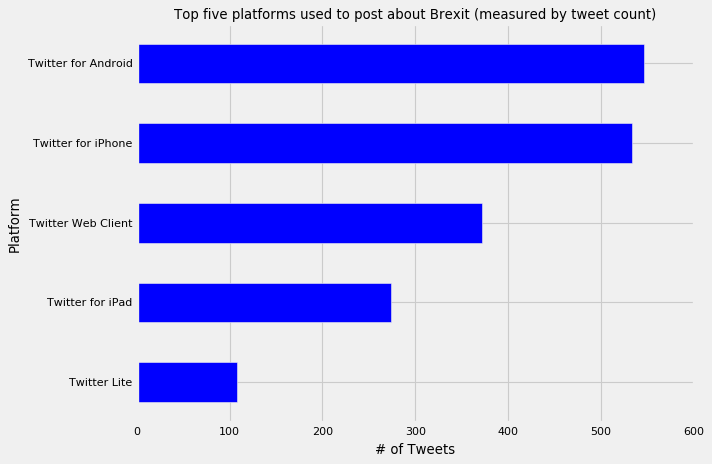

In [398]:
plt.style.use('fivethirtyeight')

brex['platform'].value_counts().head(5).plot(kind='barh', fontsize = 10, color = 'blue').invert_yaxis()
plt.ylabel('Platform', fontsize = 12)
plt.xlabel('# of Tweets', fontsize = 12)
plt.title('Top five platforms used to post about Brexit (measured by tweet count)', fontsize = 12)
plt.show()

# bar chart of the 5 most commonly used platforms

In [304]:
migration.platform.value_counts().head(5)

# 5 most commonly used platforms in the subset 'Brexit & migration'

Twitter for Android    59
Twitter Web Client     47
Twitter for iPhone     42
Twitter for iPad       41
Twitter Lite           11
Name: platform, dtype: int64

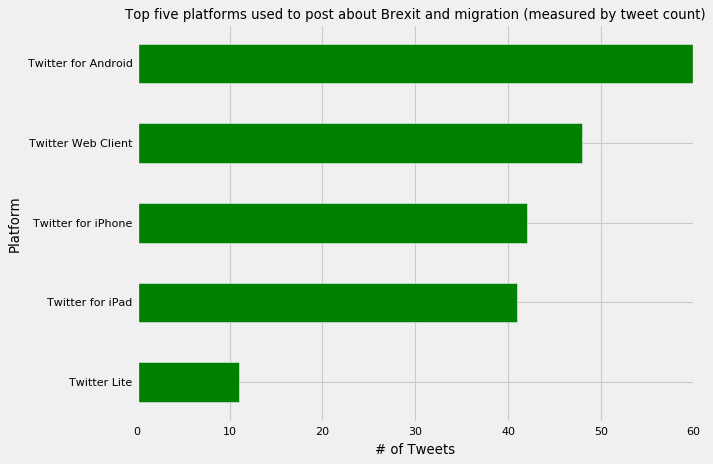

In [399]:
migration['platform'].value_counts().head(5).plot(kind='barh', fontsize = 10, color = 'green').invert_yaxis()
plt.ylabel('Platform', fontsize = 12)
plt.xlabel('# of Tweets', fontsize = 12)
plt.title('Top five platforms used to post about Brexit and migration (measured by tweet count)', fontsize = 12)

plt.show()

# bar chart of the 5 most commonly used platforms in the subset 'Brexit & migration'

In [396]:
brex.tweet_text.value_counts().head(5)

# most frequent tweets/retweets in the sample

RT @Scientists4EU: Johnson &amp; Johnson pulls plan for UK research centre... citing political &amp; economic weakness caused by Brexit, concerns o…    74
RT @acgrayling: We should demand FREE VOTES by MPs in all Brexit matters in Parliament. Whipping the vote - forcing MPs to vote against the…            36
RT @StephenMangan: It’s started. Who’s to blame for the negative effects of Brexit? Those who voted against it, of course! #horseshit https…            29
RT @ThatTimWalker: The stench from Legatum is becoming over-powering  https://t.co/KsV5JLwdlq                                                           23
RT @V_of_Europe: EU to cross 'red line' by imposing new rules on UK during transition https://t.co/CE65MLQdwS                                           22
Name: tweet_text, dtype: int64

In [397]:
brex[['tweet_text','retweets']].sort_values('retweets',ascending=False).head(3)
# three tweets with highest retweet count (in the scraped timeframe)

,tweet_text,retweets
690,RT @davidschneider: Latest Brexit bus revealed. #Budget2017 https://t.co/sUnVCVzhmC,12659
1237,"RT @RichardDawkins: “Animals” can’t feel pain or emotions? “Animals”?\nWe aren’t plants, fungi or bacteria, so that makes us animals.\n\nAt wh…",5840
1427,RT @paulwaugh: So Hammond is spending more on Brexit preparations (£3bn) than on the NHS (£2.8bn resource cash). That wasn't on Boris's bus…,5195


In [307]:
brex.user_location.value_counts().head(10)

# top 10 user locations for the whole sample

United Kingdom              71
London                      67
UK                          54
London, England             40
England, United Kingdom     23
Wales, United Kingdom       18
West London , England       17
Scotland                    16
London as yet GB, Europe    14
England                     14
Name: user_location, dtype: int64

In [350]:
migration.user_location.value_counts().head(10)

# top 10 user locations for migration-related tweets

UK                         14
United Kingdom             12
London                      8
West London , England       6
England                     5
London, England             4
England, United Kingdom     3
Yorkshire                   3
manchester                  3
Wales, United Kingdom       2
Name: user_location, dtype: int64